<a href="https://colab.research.google.com/github/LucioFassarella/curso_CQ/blob/main/curso_QC_FaseRelativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Computação Quântica
## Experimentos com *fase relativa*


<font color = "yellow">**Qiskit**:</font>
*   [Python's Instalation](https://pypi.org/project/qiskit/)
*   [IBM Quantum cloud](https://quantum.cloud.ibm.com/)
    *   [Qiskit connect](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started) (IBM Runtime Service)
       *   [Getting Started](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started)
*   [Qiskit](https://docs.quantum.ibm.com/api/qiskit)
    *   [Qiskit Circuit Library](https://docs.quantum.ibm.com/api/qiskit/circuit_library)
    *   [Qiskit Gates Tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb)
    *   [List of Quantum Logic Gates](https://en.wikipedia.org/wiki/List_of_quantum_logic_gates)

[<font color="yellow">**Execution modes**</font>](https://quantum.cloud.ibm.com/docs/en/guides/execution-modes)

*	[Modos de Execução](https://quantum.cloud.ibm.com/docs/en/guides/choose-execution-mode)
*   [Single Job](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples#estimator-examples)
*	[Batch mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-batch)
*	[Section mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-session)
*	[Primitives examples](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples)


[<font color="yellow">**Simuladores Locais**</font>](https://quantum.cloud.ibm.com/docs/en/migration-guides/local-simulators)

---

⏬

## <font color = "orange">Introdução à Computação Quântica</font>







# QISKIT: Carregamento

In [1]:
!pip install qiskit -U
!pip install qiskit_aer -U
!pip install qiskit-ibm-runtime -U

!pip install matplotlib
!pip install pylatexenc

import qiskit
qiskit.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.7/368.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=41b0239765f9f9df4a8d8cad8f75ae82b676f65f285a9d7d9300609e495a175b
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178

'2.2.1'

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Conecção com a IBM

...

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(
    channel="ibm_cloud",
    token = token_privado,
    instance = instance_do_projeto
    )

## Save account to disk and save it as the default.
#QiskitRuntimeService.save_account(channel="ibm_cloud", token="<IBM Cloud API key>", instance="<IBM Cloud CRN>", name="account-name", set_as_default=True)

## Load the saved credentials
#service = QiskitRuntimeService(name="account-name")

qiskit_runtime_service._discover_account:WARNING:2025-10-06 16:54:14,725: Loading account with the given token. A saved account will not be used.


In [2]:
## Backend fake
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
backend = FakeBrisbane() # FakeBrisbane(): 127 qubits. Mais fake backends: 'https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/fake-provider'


In [3]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

# Método de Primitivos



In [4]:
def qiskit_sampler(circuito_com_medidas, shots = None, backend = None):
    '''
    Método para executar o Sampler
    >>> O Sampler realiza medidas em circuitos quânticos e retorna a contagem de qubits.
        A partir dos resultados do Sampler, podemos estimar as probabilidade de cada resultado.

    Input:
        circuito : circuito quântico que prepara um estado de qubits
        backend  : backend para rodar o Sampler

    Saída:
        resultado do Sampler

    Observação: os resultados do Sampler são rotulados pelo nomes dos registros clássicos.
                Para um circuito com medidas definidas por 'measure_all', o rótulo é 'meas'.
                Para circuitos com medidas definidas de início sem denominação explícita,
                os rótulos são 'c', 'c1', 'c2', etc.

    Tutorial do SamplerV2: https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/sampler-v2
    '''

    # Importação de métodos e backend

    from qiskit_ibm_runtime import SamplerV2 as Sampler

    if backend is None:
        from qiskit_ibm_runtime.fake_provider import FakeBrisbane
        backend = FakeBrisbane()
    else:
        backend = backend

    from qiskit.transpiler import generate_preset_pass_manager
    pm = generate_preset_pass_manager(optimization_level=2, backend = backend)

    # Transpilação

    isa_circuitos = pm.run(circuito_com_medidas)

    if shots is None:
        shots = 2**10
    else:
        shots = shots

    sampler = Sampler(backend)
    job = sampler.run([(isa_circuitos, )], shots = shots)
    result = job.result()
    counts = result[0].data['c'].get_counts()

    return counts, result

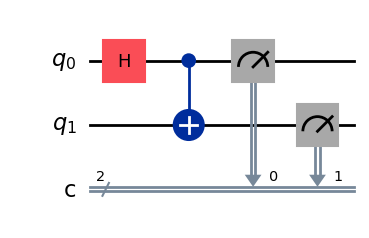

({'11': 516, '00': 493, '01': 11, '10': 4},
 PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2}))

In [5]:
'''
Teste
'''

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
#print(qc)
display(qc.draw('mpl'))

resultado = qiskit_sampler(qc)
resultado

In [6]:
def qiskit_estimator(circuito_sem_medidas, hamiltoniano, precisao = None, backend = None):
    '''
    Método para executar o Estimator
    >>> O Estimator estima valores esperados de circuitos e observáveis.

    Input:
        circuito : circuito quântico que prepara um estado de qubits
        hamiltoniano (SparsePauliOp): hamiltoniano a ser medido
        precisao (float): precisão do resultado
        backend  : backend para rodar o Estimator

    Saída:
        resultado do Estimator

    Tutorial do EstimatorV2: https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/estimator-v2
    '''

    # Importação de métodos e backend

    from qiskit_ibm_runtime import EstimatorV2 as Estimator
    from qiskit.transpiler import generate_preset_pass_manager

    # Use the existing service object
    # service = QiskitRuntimeService()
    if backend is None:
        from qiskit_ibm_runtime.fake_provider import FakeBrisbane
        backend = FakeBrisbane()
    else:
        backend = backend

    if precisao is None:
        precisao = 2**(-10)
    else:
        precisao = precisao

    # Transpilação

    pm = generate_preset_pass_manager(backend = backend, optimization_level=1)
    isa_circuito = pm.run(circuito_sem_medidas)
    isa_hamiltoniano = hamiltoniano.apply_layout(isa_circuito.layout)

    # Estimator:

    estimator = Estimator(mode=backend)

    # Job
    job = estimator.run([(isa_circuito, isa_hamiltoniano, )])
    pub_result = job.result()[0]

    return pub_result.data.evs

In [8]:
'''
Teste
'''


qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
print(qc)

from qiskit.quantum_info import SparsePauliOp
hamiltoniano = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
print(f"Hamiltoniano: {hamiltoniano}")

precisao = 2**(-10)
print(f"Precisão: {precisao}")

resultado = qiskit_estimator(qc, hamiltoniano, precisao)
display(f"Valor esperado: {resultado}")

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               
Hamiltoniano: SparsePauliOp(['II', 'IZ', 'XI'],
              coeffs=[1.+0.j, 2.+0.j, 3.+0.j])
Precisão: 0.0009765625


'Valor esperado: 1.013671875'

# Experimentos com Fase Relativa

<font color="yellow">Estado:</font>

$$
\begin{split}
| \psi (\theta) \rangle &= \frac{|0 \rangle + e^{i\theta}|1\rangle}{\sqrt{2}} =P(\theta) H |0\rangle,
\end{split}
$$
onde
$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix},\
\
P(\theta) =
\begin{pmatrix}
1 & 0 \\
0 & e^{i\theta}
\end{pmatrix}.
$$
<font color="yellow">
Medida na base computacional (de auto-estados de $Z$):</font>
$$
\begin{split}
P_Z( 0 \vert \psi(\theta)) &= |\langle 0 | \psi(\theta) \rangle|^2 = 1/2.\\
P_Z( 1 \vert \psi(\theta)) &= |\langle 1 | \psi(\theta) \rangle|^2 = 1/2.
\end{split}
$$

Verifica-se duas condições necessárias de uma probabilidade:
$$
P_X(0 \vert \psi(\theta)), P_X(- \vert \psi(\theta)) \in \left\lbrack 0,1 \right\rbrack
$$
e
$$
P_X(1 \vert \psi(\theta)) + P_X(- \vert \psi(\theta))= 1.
$$
Cabe observar que as probabilidades não dependem da fase relativa $\theta$.

$\star$

<font color="yellow">Medida na base $\left\{ |+\rangle, |-\rangle \right\}$ (de auto-estados de $X$):</font>
$$
\begin{split}
P_X(+ \vert \psi(\theta)) &= |\langle + | \psi(\theta) \rangle|^2 \\
&= \left\vert \left(\frac{ \langle 0|  + \langle 1|}{\sqrt{2}}\right) \left(\frac{|0 \rangle + e^{i\theta}|1\rangle}{\sqrt{2}}\right)\right\vert^2\\
&= \frac{1}{4}\left\vert \langle 0| 0 \rangle + e^{i\theta}\langle 0 | 1 \rangle  + \langle 1| 0 \rangle + e^{i\theta} \langle 1 |1\rangle \right\vert^2\\
&= \frac{1}{4} \left\vert 1 + e^{i\theta} \right\vert^2 \\
&= \frac{1}{4}  \left\vert 1 + \cos(\theta) + i \sin(\theta) \right\vert^2\\
&= \frac{1 + \cos(\theta)}{2}.
\end{split}
$$
e

$$
\begin{split}
P_X(- \vert \psi(\theta)) &= |\langle - | \psi(\theta) \rangle|^2 \\
&= \left\vert \left(\frac{ \langle 0|  - \langle 1|}{\sqrt{2}}\right) \left(\frac{|0 \rangle + e^{i\theta}|1\rangle}{\sqrt{2}}\right)\right\vert^2\\
&= \frac{1}{4}\left\vert \langle 0| 0 \rangle + e^{i\theta}\langle 0 | 1 \rangle  - \langle 1| 0 \rangle - e^{i\theta} \langle 1 |1\rangle \right\vert^2\\
&= \frac{1}{4} \left\vert 1 - e^{i\theta} \right\vert^2 \\
&= \frac{1}{4}  \left\vert 1 - \cos(\theta) - i \sin(\theta) \right\vert^2\\
&= \frac{1 - \cos(\theta)}{2}.
\end{split}
$$

Verifica-se duas condições necessárias de uma probabilidade:
$$
P_X(+ \vert \psi(\theta)), P_X(- \vert \psi(\theta)) \in \left\lbrack 0,1 \right\rbrack
$$
e
$$
P_X(+ \vert \psi(\theta)) + P_X(- \vert \psi(\theta))= 1.
$$
Cabe observar que as probabilidades agora dependerem da fase relativa $\theta$:

## Medida de $|\psi(\theta) \rangle>$ na base computacional $\left\{|0\rangle , |1\rangle \right\}$:

$\rightarrow$ O resultado não depende de $\theta$.

Circuito que prepara o estado | psi >:


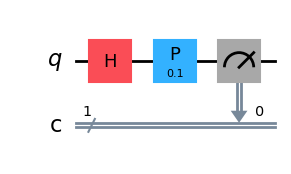

In [9]:
# Experimentos com o Sampler: Medida na base { |0>, |1>}

import numpy as np

th = 0.1#np.pi/2
qc = QuantumCircuit(1,1)
qc.h(0)
qc.p(th,0)
qc.measure([0],[0])

print("Circuito que prepara o estado | psi >:")
display(qc.draw('mpl'))

Medida: ({'0': 124, '1': 132}, PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=256, num_bits=1>)), metadata={'shots': 256, 'circuit_metadata': {}})], metadata={'version': 2}))
Resultado: {'0': 124, '1': 132}
Probabilidade de medir |0>: 0.484375
Probabilidade de medir |1>: 0.515625


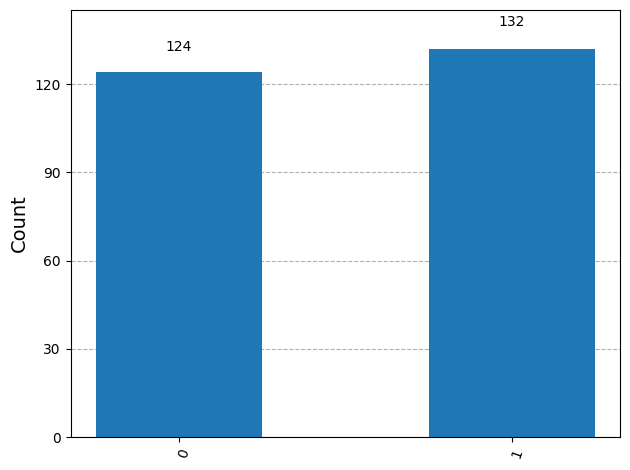

In [ ]:
# Experimento
medida = qiskit_sampler(qc, shots = 2**8, backend = FakeBrisbane())
print(f"Medida: {medida}")

resultado = medida[0]
print(f"Resultado: {resultado}")

prob_0 = resultado.get('0', 0) / sum(resultado.values())
print(f"Probabilidade de medir |0>: {prob_0}")
prob_1 = resultado.get('1', 0) / sum(resultado.values())
print(f"Probabilidade de medir |1>: {prob_1}")
#

plot_histogram(resultado)

In [10]:
# Função

def probabilidadeZ_psi(th):
    qc = QuantumCircuit(1,1)
    qc.h(0)
    qc.p(th,0)
    qc.measure([0],[0])

    medida = qiskit_sampler(qc, shots = 2**10, backend = FakeBrisbane())

    resultado = medida[0]
    prob_0 = resultado.get('0', 0) / sum(resultado.values())
    prob_1 = resultado.get('1', 0) / sum(resultado.values())

    return (prob_0,prob_1)

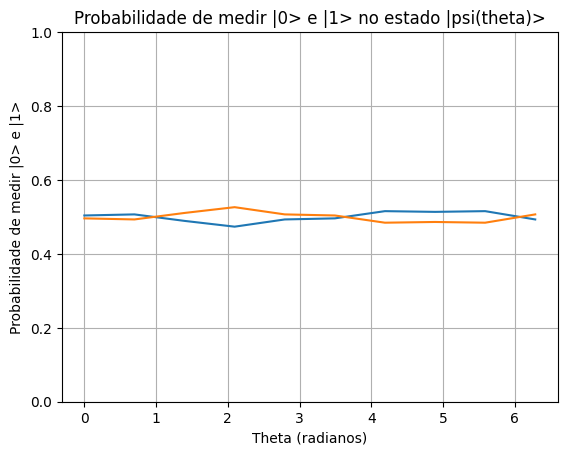

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of theta values
theta_values = np.linspace(0, 2 * np.pi, 10)

# Calculate the probability of measuring |0> for each theta value
prob_0, prob_1 = zip(*[probabilidadeZ_psi(theta) for theta in theta_values])

# Plot the results
plt.plot(theta_values, prob_0)
plt.plot(theta_values, prob_1)
plt.ylim(0, 1)
plt.xlabel("Theta (radianos)")
plt.ylabel("Probabilidade de medir |0> e |1>")
plt.title("Probabilidade de medir |0> e |1> no estado |psi(theta)>")
plt.grid(True)
plt.show()

## Medida de $|\psi(\theta) \rangle>$ na base de $X$, $\left\{|+\rangle , |-\rangle \right\}$:

$\rightarrow$ O resultado depende de $\theta$.

Circuito que prepara o estado | psi >:


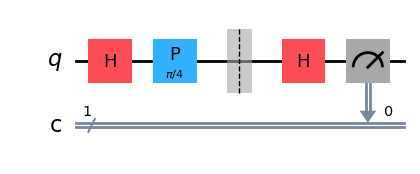

In [13]:
# Experimentos com o Sampler: Medida na base { |+>, |-> }


import numpy as np

th = np.pi/4
qc = QuantumCircuit(1,1)
qc.h(0)
qc.p(th,0)
qc.barrier()
qc.h(0) # <-- Porta para medir na base {|+>,|->}
qc.measure([0],[0])

print("Circuito que prepara o estado | psi >:")
display(qc.draw('mpl'))

Medida: ({'0': 219, '1': 37}, PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=256, num_bits=1>)), metadata={'shots': 256, 'circuit_metadata': {}})], metadata={'version': 2}))
Resultado: {'0': 219, '1': 37}
Probabilidade de medir |0>: 0.85546875
Probabilidade de medir |1>: 0.14453125


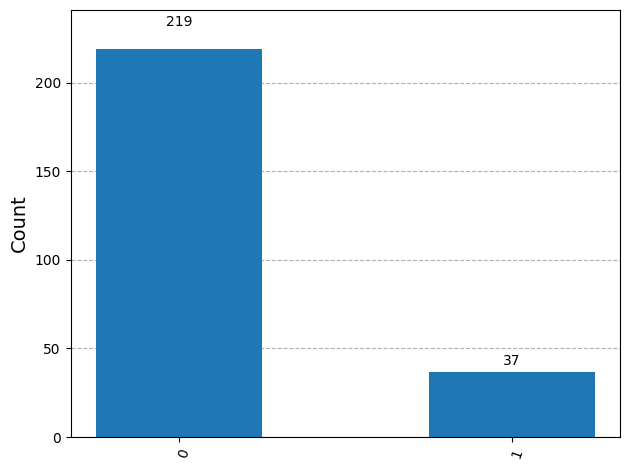

In [14]:
# Experimento
medida = qiskit_sampler(qc, shots = 2**8, backend = FakeBrisbane())
print(f"Medida: {medida}")

resultado = medida[0]
print(f"Resultado: {resultado}")

prob_plus = resultado.get('0', 0) / sum(resultado.values())
print(f"Probabilidade de medir |0>: {prob_plus}")
prob_minus = resultado.get('1', 0) / sum(resultado.values())
print(f"Probabilidade de medir |1>: {prob_minus}")
#

plot_histogram(resultado)

In [15]:
# Função

def probabilidadeX_psi(th):
    qc = QuantumCircuit(1,1)
    qc.h(0)
    qc.p(th,0)
    qc.h(0)
    qc.measure([0],[0])

    medida = qiskit_sampler(qc, shots = 2**10, backend = FakeBrisbane())

    resultado = medida[0]
    prob_plus = resultado.get('0', 0) / sum(resultado.values())
    prob_minus = resultado.get('1', 0) / sum(resultado.values())

    return (prob_plus,prob_minus)

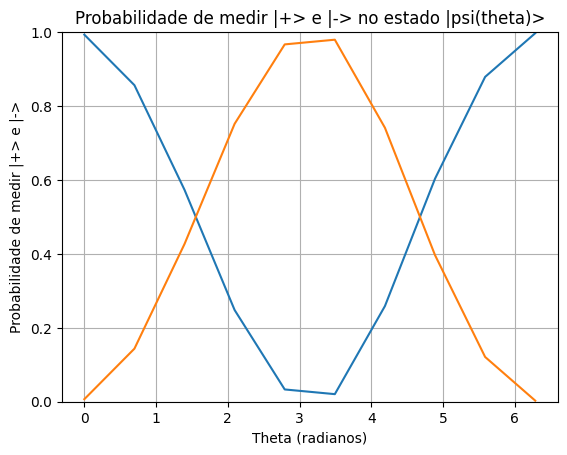

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of theta values
theta_values = np.linspace(0, 2 * np.pi, 10)

# Calculate the probability of measuring |0> for each theta value
prob_plus, prob_minus = zip(*[probabilidadeX_psi(theta) for theta in theta_values])

# Plot the results
plt.plot(theta_values, prob_plus)
plt.plot(theta_values, prob_minus)
plt.ylim(0, 1)
plt.xlabel("Theta (radianos)")
plt.ylabel("Probabilidade de medir |+> e |->")
plt.title("Probabilidade de medir |+> e |-> no estado |psi(theta)>")
plt.grid(True)
plt.show()